# build dataset

In [1]:
import seismic_dataset_builder  
(X_train, y_train, v_train), (X_test, y_test, v_test), values, labels = seismic_dataset_builder.create_bp_synth()

# build and train regression CNN

In [2]:
import seismic_ml_kernel
regression_model, v_scaler = seismic_ml_kernel.ci_multi_train_regression (X_train, v_train, 5)

Using TensorFlow backend.


image has 4600 pixels


C:\Users\kostyad\Documents\Jupyter\seismic_fingerprint\seismic_ml_kernel.py:150: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fl...)`
  vision_model = Model(input=inp, output=flat) # To define a model, just specify its input and output layers


image has 2300 pixels
image has 2350 pixels
number of vision models 3
Vision models are ready
Regression model is ready
Regression model compiled
Train on 12364 samples, validate on 1374 samples
Epoch 1/5
12364/12364 [==============================] - 881s - loss: 0.1592 - acc: 0.2612 - val_loss: 0.1676 - val_acc: 0.2409
Epoch 2/5
12364/12364 [==============================] - 932s - loss: 0.1249 - acc: 0.3293 - val_loss: 0.0624 - val_acc: 0.4389
Epoch 3/5
12364/12364 [==============================] - 940s - loss: 0.0830 - acc: 0.4110 - val_loss: 0.0395 - val_acc: 0.4549
Epoch 4/5
12364/12364 [==============================] - 936s - loss: 0.0725 - acc: 0.4253 - val_loss: 0.0345 - val_acc: 0.4578
Epoch 5/5
12364/12364 [==============================] - 935s - loss: 0.0667 - acc: 0.4359 - val_loss: 0.0282 - val_acc: 0.4658


# test regression dataset

In [3]:
seismic_ml_kernel.ci_multi_test_regression (regression_model, v_scaler, X_test, v_test)

V_test [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]
3422/3422 [==============================] - 82s    
pred [[ 0.08047372]
 [ 0.35333276]
 [ 0.17249751]
 ..., 
 [ 0.94368392]
 [ 0.87170905]
 [ 0.88284034]]
3422/3422 [==============================] - 91s    
[0.047981182520437281, 0.46639392170064425]


# regression on single image

sample: 280
sample label: BP 0.1, 0.15, 0.2, 0.25
correct: 20 predicted: [ 20.9263134]


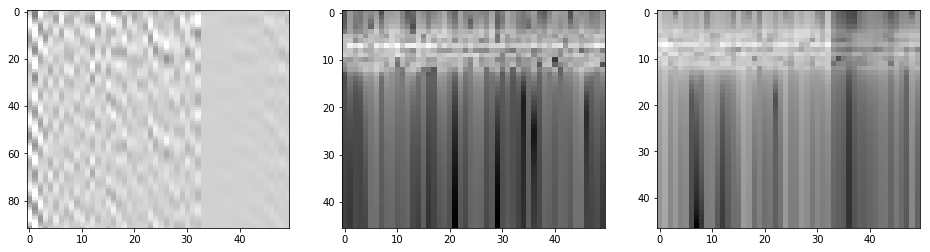

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
    
randidx, predicted_y = seismic_ml_kernel.ci_multi_evaluate_random_regression (regression_model, v_scaler, X_test)

print('sample:', randidx)
print('sample label:', labels[y_test[randidx]])
print('correct:', v_test[randidx], 'predicted:', predicted_y)

# vision model 1
![title](outputs/vision_model0.png)

# vision model 2
![title](outputs/vision_model1.png)

# vision model 3
![title](outputs/vision_model2.png)

# regression model
![title](outputs/regression_model.png)